# 1. Data Load

In [244]:
import pandas as pd
import numpy as np

In [245]:
df = pd.read_csv("marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [246]:
# data understanding 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

##### Observation outcome from the Data given 
 - Dt_Customer needs to convert into Date Time format 
 - Income is  in Object format which should be converted in to int format
 - Income is having 24 null values 

In [247]:
# Converting to Date Time 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

/tmp/ipykernel_32775/4242541463.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [248]:
#df[' Income '] = pd.to_numeric(df[' Income '])
df[' Income '] = df[' Income '].str.replace(r'[\$,]', '', regex = True).str.strip().astype(float)

In [249]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


# 2. Handling Missing Values

In [250]:
# To check if there is any null values in data
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [251]:
df.groupby(['Marital_Status', 'Education'])[' Income '].mean()

Marital_Status  Education 
Absurd          Graduation    79244.000000
                Master        65487.000000
Alone           Graduation    34176.000000
                Master        61331.000000
                PhD           35860.000000
Divorced        2n Cycle      49395.130435
                Basic          9548.000000
                Graduation    54526.042017
                Master        50331.945946
                PhD           53096.615385
Married         2n Cycle      46201.100000
                Basic         21960.500000
                Graduation    50800.258741
                Master        53286.028986
                PhD           58138.031579
Single          2n Cycle      53673.944444
                Basic         18238.666667
                Graduation    51322.182927
                Master        53530.560000
                PhD           53314.614583
Together        2n Cycle      44736.410714
                Basic         21240.071429
                Graduation 

##### Replacing missing values

In [252]:
def replace_with_group_mean(row, group_means):
    if pd.isnull(row[' Income ']):  # Check if ' Income ' is NaN
        return group_means[(row['Marital_Status'], row['Education'])]
    return row[' Income ']

# Calculate the median income for each group
group_median = df.groupby(['Marital_Status', 'Education'])[' Income '].median()
print(group_median)

# Apply the function to replace NaN values
df[' Income '] = df.apply(lambda row: replace_with_group_mean(row, group_median), axis=1)

Marital_Status  Education 
Absurd          Graduation    79244.0
                Master        65487.0
Alone           Graduation    34176.0
                Master        61331.0
                PhD           35860.0
Divorced        2n Cycle      49118.0
                Basic          9548.0
                Graduation    55635.0
                Master        49476.0
                PhD           50613.5
Married         2n Cycle      46462.5
                Basic         22352.0
                Graduation    50737.0
                Master        53088.5
                PhD           57081.5
Single          2n Cycle      48668.5
                Basic         16383.0
                Graduation    49973.5
                Master        49494.0
                PhD           50198.0
Together        2n Cycle      45774.0
                Basic         23179.0
                Graduation    53977.0
                Master        49736.0
                PhD           56756.0
Widow           2n Cycl

In [253]:
# ### Traditional way for replacing missing values 
# for index, row in df.iterrows():
#     if pd.isnull(row[' Income ']):
#         martial_status = row['Marital_Status']
#         education = row['Education']
#         print("Mean : ", df.loc[(df['Marital_Status'] == martial_status) & (df['Education'] == education), ' Income '].mean())
#         mean = df.loc[(df['Marital_Status'] == martial_status) & (df['Education'] == education), ' Income '].mean()
#         df.at[index, ' Income '] = mean
    
    

In [254]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

##### Now no missing values are left in data frame

# 3. New variable for Children count, age, total spending & purchase

In [255]:
# Total Spending
df ["total_spending"] = (df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'])

In [256]:
# Age
df['Age'] = 2025 - df['Year_Birth']

In [257]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [258]:
# 3.a Total Purchase across all channel 
df['Total_purchase'] =  (df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases'])

In [259]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_spending,Age,Total_Children,Total_purchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,1190,55,0,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,577,64,0,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,251,67,1,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,11,58,2,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,91,36,1,8


# 4. Visualization for Outlier

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

In [261]:
def plot_distribution(col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(1,2,2)
    sns.histplot(df[col], kde= True)
    plt.title(f'Histogram of {col}')
    plt.show()

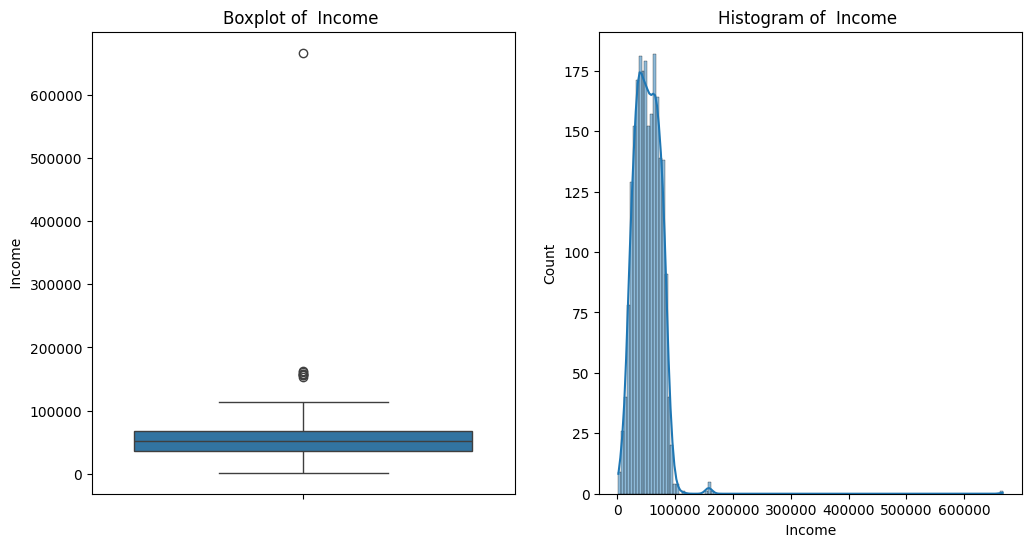

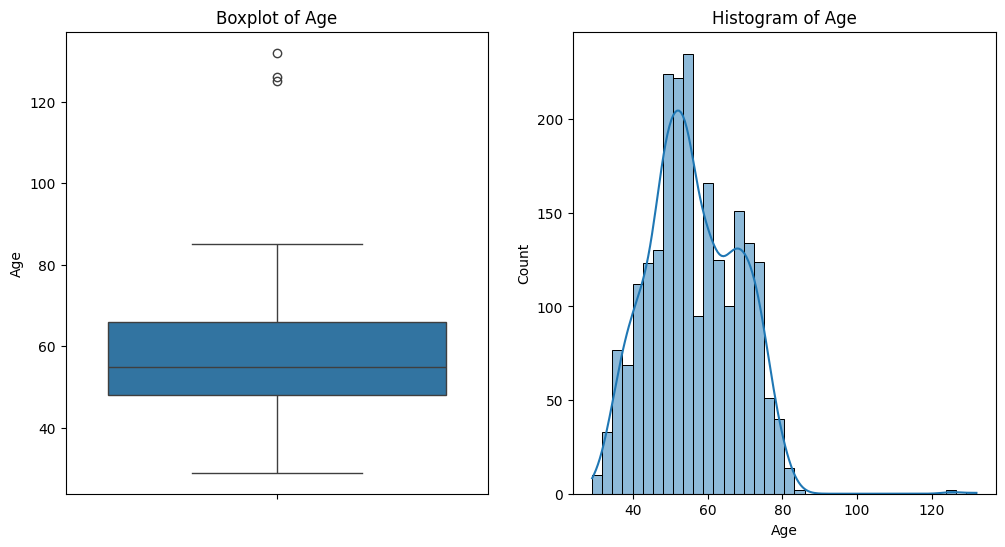

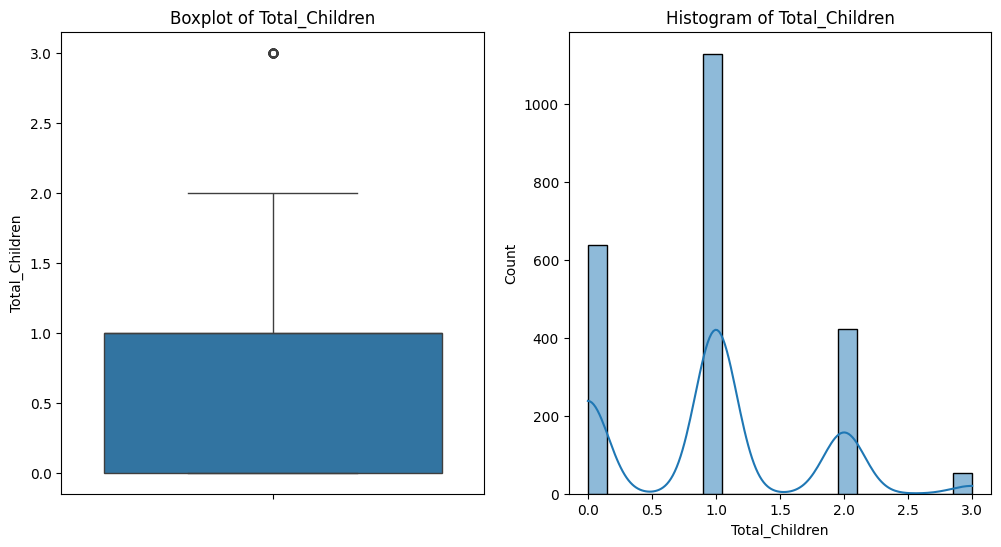

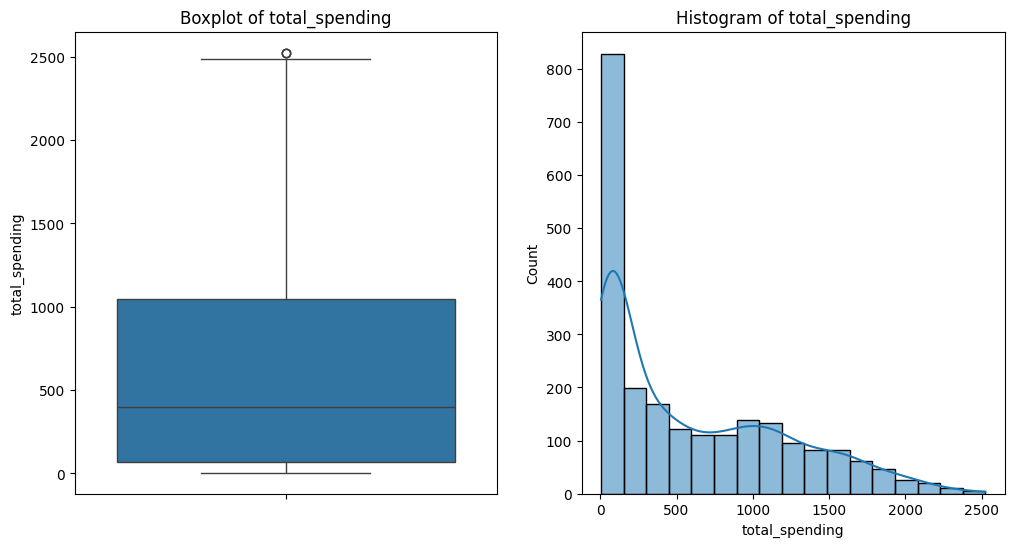

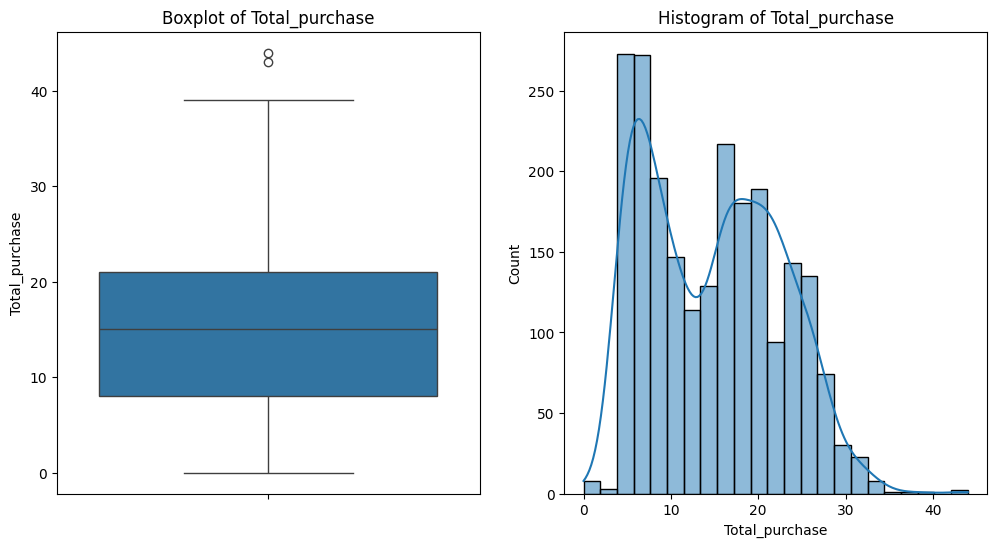

In [262]:
for col in [' Income ', 'Age', 'Total_Children', 'total_spending', 'Total_purchase']:
    plot_distribution(col)

### Outlier Treatment 

In [263]:
# Total Income

a = df[' Income ']
q1= a.quantile(0.25)
q3= a.quantile(0.75)
iqr = q3 - q1
df = df[(a >= q1-1.5 * iqr) & (a <= q3+1.5 * iqr)]

In [264]:
# Total Age

a = df['Age']
q1= a.quantile(0.25)
q3= a.quantile(0.75)
iqr = q3 - q1
df = df[(a >= q1-1.5 * iqr) & (a <= q3+1.5 * iqr)]

In [265]:
# Total Children

q1= df['Total_Children'].quantile(0.25)
q3= df['Total_Children'].quantile(0.75)
iqr = q3 - q1
df = df[(df['Total_Children'] >= q1-1.5 * iqr) & (df['Total_Children'] <= q3+1.5 * iqr)]

In [266]:
# Total Spending

q1= df['total_spending'].quantile(0.25)
q3= df['total_spending'].quantile(0.75)
iqr = q3 - q1
df = df[(df['total_spending'] >= q1-1.5 * iqr) & (df['total_spending'] <= q3+1.5 * iqr)]

In [267]:
# Total Purchase

q1= df['Total_purchase'].quantile(0.25)
q3= df['Total_purchase'].quantile(0.75)
iqr = q3 - q1
df = df[(df['Total_purchase'] >= q1-1.5 * iqr) & (df['Total_purchase'] <= q3+1.5 * iqr)]

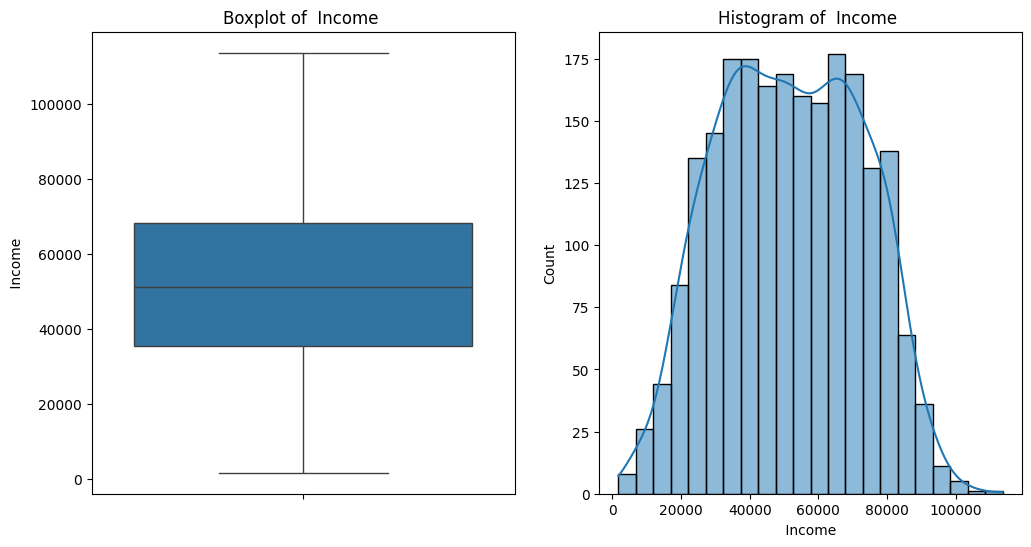

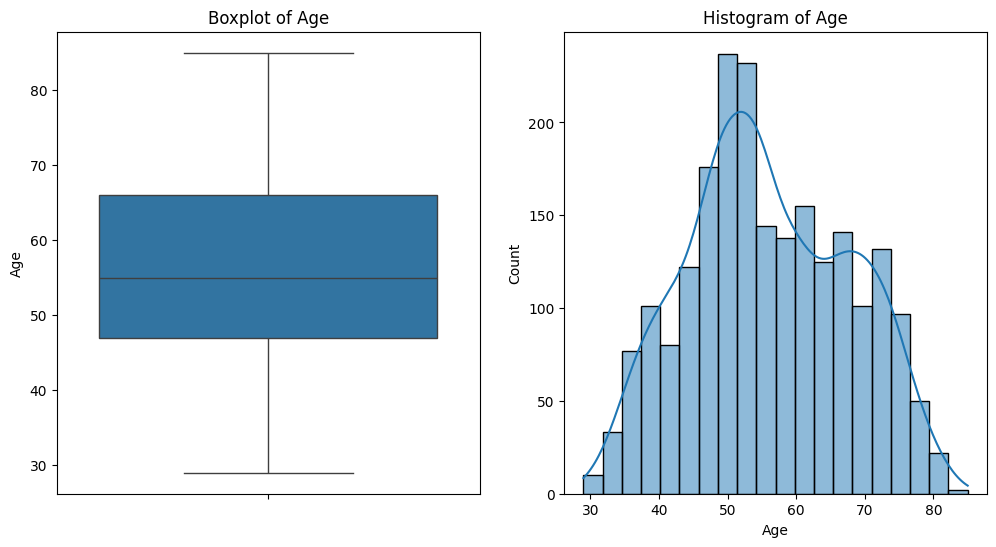

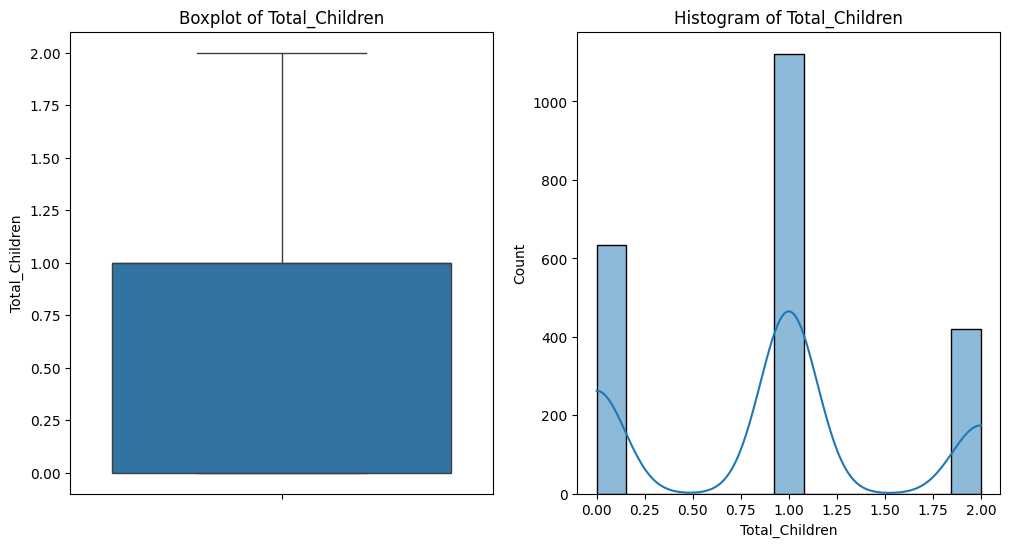

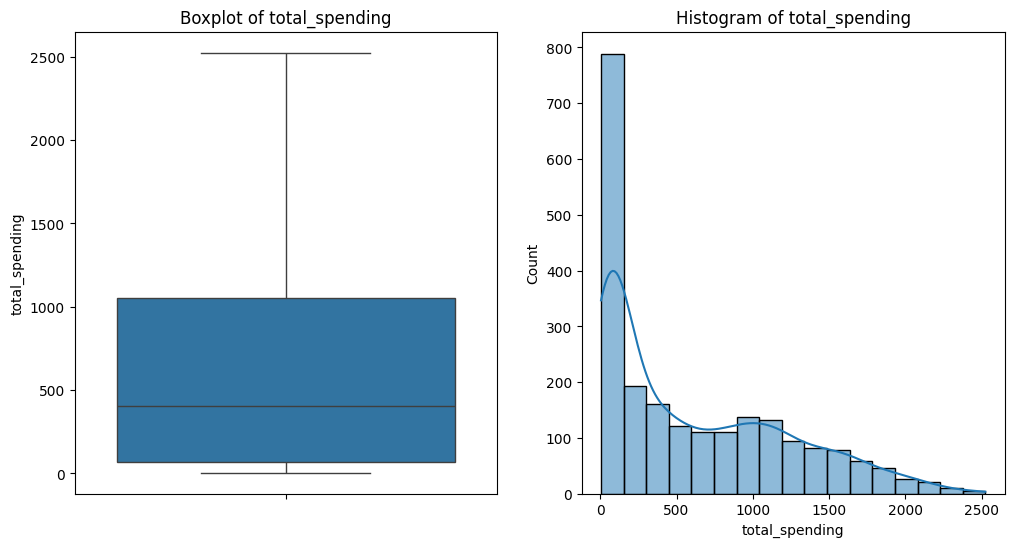

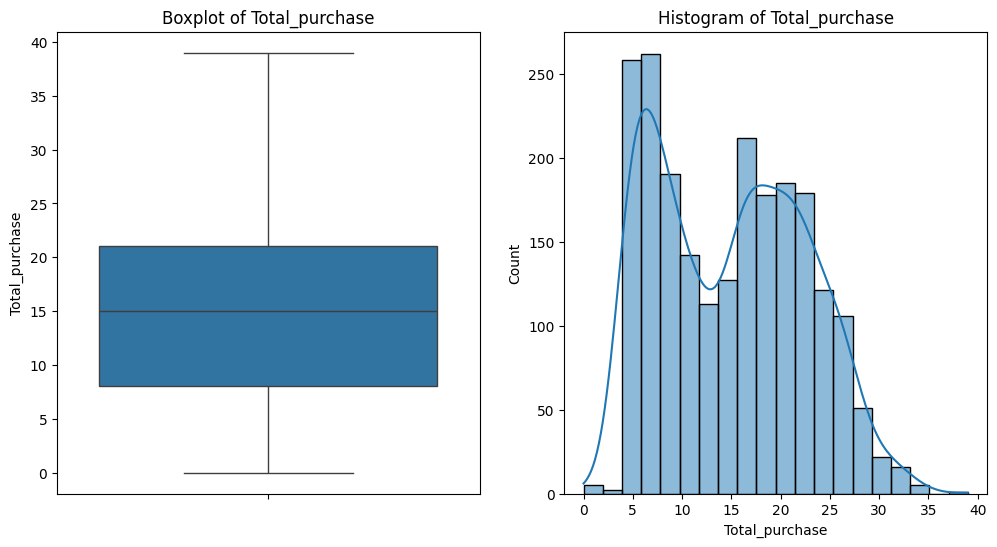

In [268]:
for col in [' Income ', 'Age', 'Total_Children', 'total_spending', 'Total_purchase']:
    plot_distribution(col)

# Output After Outlier

# 5. Encoding- Converting String values into Numerical Format 

In [269]:
# As martial status is having no order in representation so we use one hot encoding for martial status
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
one_hot = OneHotEncoder()
one_hot_encode_df = pd.get_dummies(df, columns=['Marital_Status'])
print(one_hot_encode_df)



         ID  Year_Birth   Education   Income   Kidhome  Teenhome Dt_Customer  \
0      1826        1970  Graduation   84835.0        0         0  2014-06-16   
1         1        1961  Graduation   57091.0        0         0  2014-06-15   
2     10476        1958  Graduation   67267.0        0         1  2014-05-13   
3      1386        1967  Graduation   32474.0        1         1  2014-05-11   
4      5371        1989  Graduation   21474.0        1         0  2014-04-08   
...     ...         ...         ...       ...      ...       ...         ...   
2235  10142        1976         PhD   66476.0        0         1  2013-03-07   
2236   5263        1977    2n Cycle   31056.0        1         0  2013-01-22   
2237     22        1976  Graduation   46310.0        1         0  2012-12-03   
2238    528        1978  Graduation   65819.0        0         0  2012-11-29   
2239   4070        1969         PhD   94871.0        0         2  2012-09-01   

      Recency  MntWines  MntFruits  ...

In [270]:
one_hot_encode_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2175 non-null   int64         
 1   Year_Birth               2175 non-null   int64         
 2   Education                2175 non-null   object        
 3    Income                  2175 non-null   float64       
 4   Kidhome                  2175 non-null   int64         
 5   Teenhome                 2175 non-null   int64         
 6   Dt_Customer              2175 non-null   datetime64[ns]
 7   Recency                  2175 non-null   int64         
 8   MntWines                 2175 non-null   int64         
 9   MntFruits                2175 non-null   int64         
 10  MntMeatProducts          2175 non-null   int64         
 11  MntFishProducts          2175 non-null   int64         
 12  MntSweetProducts         2175 non-null 

In [271]:
df = one_hot_encode_df
print(df.head())

      ID  Year_Birth   Education   Income   Kidhome  Teenhome Dt_Customer  \
0   1826        1970  Graduation   84835.0        0         0  2014-06-16   
1      1        1961  Graduation   57091.0        0         0  2014-06-15   
2  10476        1958  Graduation   67267.0        0         1  2014-05-13   
3   1386        1967  Graduation   32474.0        1         1  2014-05-11   
4   5371        1989  Graduation   21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Total_Children  Total_purchase  \
0        0       189        104  ...               0              15   
1        0       464          5  ...               0              18   
2        0       134         11  ...               1              11   
3        0        10          0  ...               2               4   
4        0         6         16  ...               1               8   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                  False     

In [272]:
# Onehot encoding for Country as Country is also in String format so we need to encode it as well 
one_hot_encode_df = pd.get_dummies(df, columns=['Country'])
print(one_hot_encode_df)
df = one_hot_encode_df

         ID  Year_Birth   Education   Income   Kidhome  Teenhome Dt_Customer  \
0      1826        1970  Graduation   84835.0        0         0  2014-06-16   
1         1        1961  Graduation   57091.0        0         0  2014-06-15   
2     10476        1958  Graduation   67267.0        0         1  2014-05-13   
3      1386        1967  Graduation   32474.0        1         1  2014-05-11   
4      5371        1989  Graduation   21474.0        1         0  2014-04-08   
...     ...         ...         ...       ...      ...       ...         ...   
2235  10142        1976         PhD   66476.0        0         1  2013-03-07   
2236   5263        1977    2n Cycle   31056.0        1         0  2013-01-22   
2237     22        1976  Graduation   46310.0        1         0  2012-12-03   
2238    528        1978  Graduation   65819.0        0         0  2012-11-29   
2239   4070        1969         PhD   94871.0        0         2  2012-09-01   

      Recency  MntWines  MntFruits  ...

In [273]:
# As Grduation is having Order so we can apply oridinal encoding here. 
# Various Education field covered in dataframe - 
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [274]:
# Oridinal Encoding 
edu_map  = {'Basic':1, '2n Cycle':2, 'Graduation':3, 'Master':4, 'PhD':5}
df['Education_encoded'] = df['Education'].map(edu_map)
print(df.head())

      ID  Year_Birth   Education   Income   Kidhome  Teenhome Dt_Customer  \
0   1826        1970  Graduation   84835.0        0         0  2014-06-16   
1      1        1961  Graduation   57091.0        0         0  2014-06-15   
2  10476        1958  Graduation   67267.0        0         1  2014-05-13   
3   1386        1967  Graduation   32474.0        1         1  2014-05-11   
4   5371        1989  Graduation   21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Marital_Status_YOLO  Country_AUS  \
0        0       189        104  ...                False        False   
1        0       464          5  ...                False        False   
2        0       134         11  ...                False        False   
3        0        10          0  ...                False         True   
4        0         6         16  ...                False        False   

   Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  Country_SP  \
0       False

In [275]:
df = df.drop(columns=['Education'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2175 non-null   int64         
 1   Year_Birth               2175 non-null   int64         
 2    Income                  2175 non-null   float64       
 3   Kidhome                  2175 non-null   int64         
 4   Teenhome                 2175 non-null   int64         
 5   Dt_Customer              2175 non-null   datetime64[ns]
 6   Recency                  2175 non-null   int64         
 7   MntWines                 2175 non-null   int64         
 8   MntFruits                2175 non-null   int64         
 9   MntMeatProducts          2175 non-null   int64         
 10  MntFishProducts          2175 non-null   int64         
 11  MntSweetProducts         2175 non-null   int64         
 12  MntGoldProds             2175 non-null 

# 6. Heatmap of Corelation

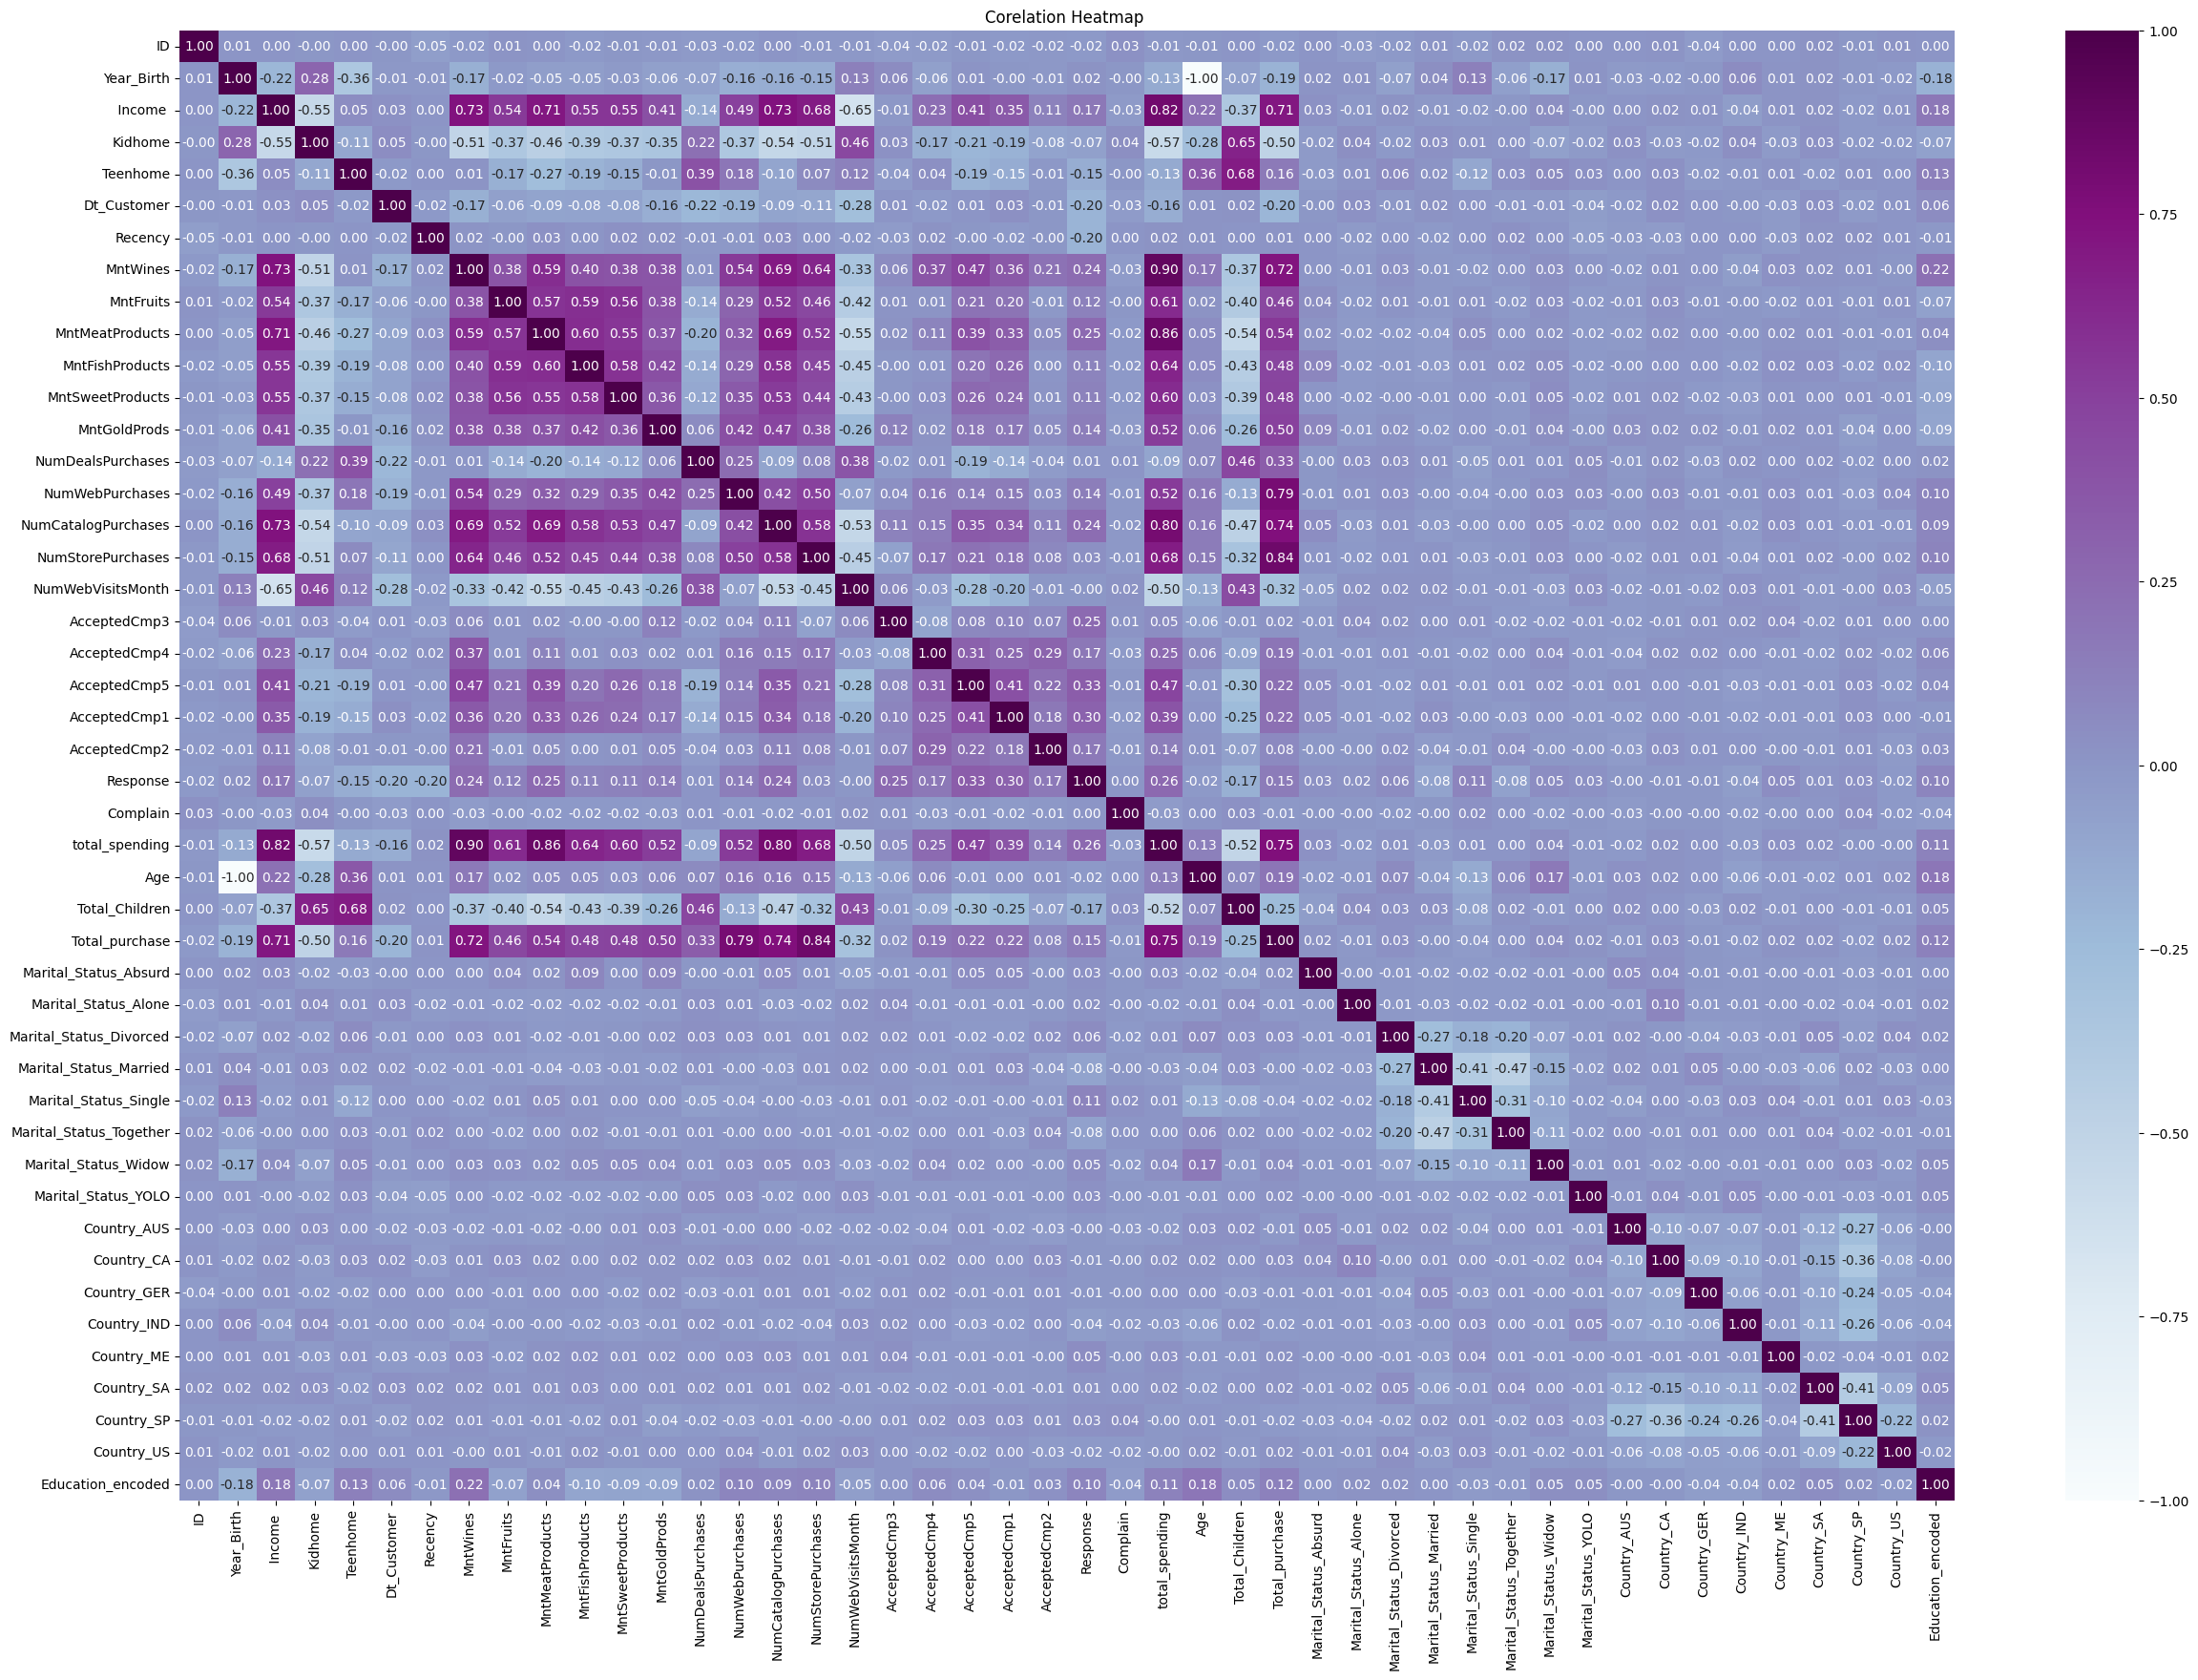

In [276]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='BuPu', fmt='.2f')
plt.title("Corelation Heatmap ")
plt.show()

# 7. Hypothesis Analysis

### A. Old Age person is more align towards Store purchasing in comparision to Younger generation

In [277]:
from scipy.stats import ttest_ind

In [278]:
old_cust = df[df['Age'] > df['Age'].median()]
young_cust = df[df['Age'] <= df['Age'].median()]
t_stat, p_value = ttest_ind(old_cust['NumStorePurchases'], young_cust['NumStorePurchases'])
print(f"Hypothesis A: t-statistic = {t_stat}, p-value = {p_value}")

Hypothesis A: t-statistic = 6.735640402240729, p-value = 2.0826907682369782e-11


### B. Customer with Children mostly do Online Shoping

In [279]:
# data with online purchase
df['Online_Purchase'] = df['NumCatalogPurchases'] + df['NumWebPurchases']
df_with_child = df[df['Total_Children'] > 0]
df_without_child = df[df['Total_Children'] == 0]
t_stat, p_value = ttest_ind(df_with_child['Online_Purchase'], df_without_child['Online_Purchase'])
print(f"Hypothesis B: t-statistic = {t_stat}, p-value = {p_value}")

Hypothesis B: t-statistic = -15.706131967638772, p-value = 9.757123269594968e-53


### C. Risk of Cannibalization of Store sales by alternative distribution channel 

In [280]:
store_sales = df['NumStorePurchases']
alt_ch = df['Online_Purchase'] + df['NumDealsPurchases']

In [281]:
correlation = np.corrcoef(store_sales, alt_ch)[0,1]
print(f"Hypothesis C: Correlation between store sales and alternative channels = {correlation}")
print("Analysis:  As coeff is more than .5 so there is chances of cannibalization due to alternate channels")

Hypothesis C: Correlation between store sales and alternative channels = 0.6023088481253391
Analysis:  As coeff is more than .5 so there is chances of cannibalization due to alternate channels


### D. United State Performance with other country

In [282]:
df_us_cust = df[df['Country_US'] == True]
# print("US Countries \n\n",df_us_cust.head())
df_not_us_cust = df[df['Country_US'] != True]
# print("\n\n\nOther Than US Countries \n\n",df_not_us_cust.head())

In [283]:
t_stat, p_value  = ttest_ind(df_us_cust['Total_purchase'], df_not_us_cust['Total_purchase'])
print(f"Hypothesis D: t-statistic = {t_stat}, p-value = {p_value}")

Hypothesis D: t-statistic = 0.8725676325429069, p-value = 0.3829951933706168


# 8. More Visualization 

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2239
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2175 non-null   int64         
 1   Year_Birth               2175 non-null   int64         
 2    Income                  2175 non-null   float64       
 3   Kidhome                  2175 non-null   int64         
 4   Teenhome                 2175 non-null   int64         
 5   Dt_Customer              2175 non-null   datetime64[ns]
 6   Recency                  2175 non-null   int64         
 7   MntWines                 2175 non-null   int64         
 8   MntFruits                2175 non-null   int64         
 9   MntMeatProducts          2175 non-null   int64         
 10  MntFishProducts          2175 non-null   int64         
 11  MntSweetProducts         2175 non-null   int64         
 12  MntGoldProds             2175 non-null 

### A. Identification of top performing product

In [285]:
df_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
print(df_product.head())


   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       189        104              379              111               189   
1       464          5               64                7                 0   
2       134         11               59               15                 2   
3        10          0                1                0                 0   
4         6         16               24               11                 0   

   MntGoldProds  
0           218  
1            37  
2            30  
3             0  
4            34  


MntWines            670742
MntFruits            58364
MntMeatProducts     363300
MntFishProducts      83529
MntSweetProducts     60191
MntGoldProds         97341
dtype: int64


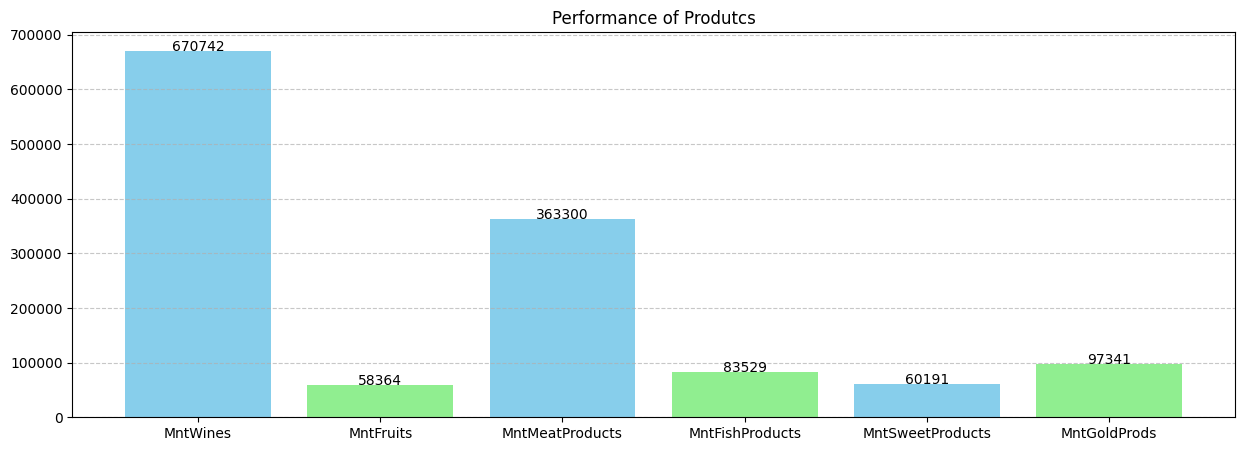

In [286]:
col_sum = df_product.sum()
print(col_sum)
plt.figure(figsize=(15,5))
bars = plt.bar(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], col_sum.values, color=['skyblue', 'lightgreen'])

# Adding total values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, str(yval), ha='center', fontsize=10, color='black')


plt.title('Performance of Produtcs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### B. Corelation between Customer's Age & acceptamce rate in last campaign

In [287]:
cust_age = df['Age']
accept_last_camp = df['AcceptedCmp5']
correlation = np.corrcoef(cust_age, accept_last_camp)[0,1]
print(correlation)

-0.014525797562183175


##### Negative output shows that there is not corelation between Age and Acceptance Rate

### C. Country with Highet number of customer who accepted the last campaign

In [288]:
# Reading data again 
df_new = pd.read_csv("marketing_data.csv")
df_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [289]:
grouped_data = df_new.groupby('Country')['AcceptedCmp5'].sum()
print(grouped_data)

Country
AUS    13
CA     21
GER     8
IND     6
ME      0
SA     21
SP     89
US      5
Name: AcceptedCmp5, dtype: int64


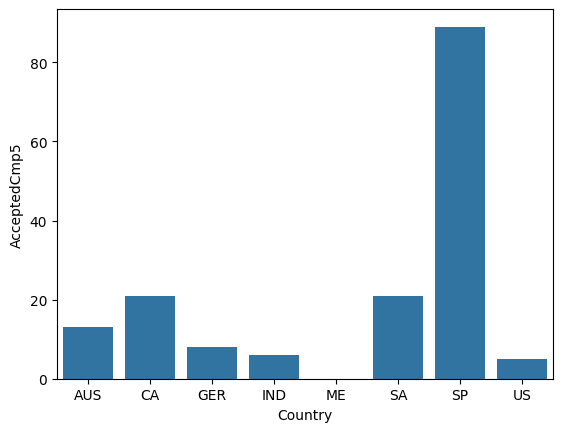

In [290]:
sns.barplot(grouped_data)
plt.show()

##### Spain accepted most of the campaign in last chance

### D. Customer who logged complain

Education
2n Cycle       4
Basic          0
Graduation    14
Master         2
PhD            1
Name: Complain, dtype: int64


<Axes: xlabel='Education', ylabel='Complain'>

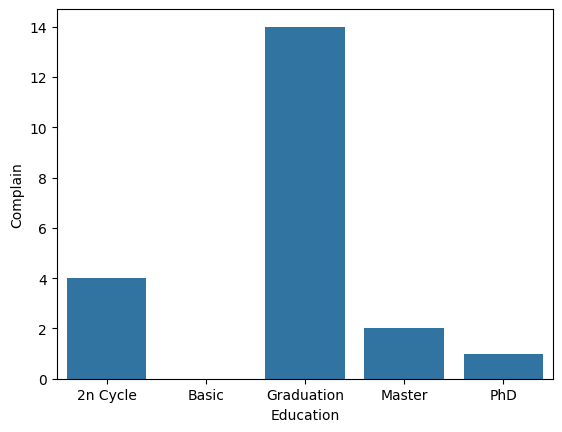

In [291]:
grouped_data = df_new.groupby('Education')['Complain'].sum()
print(grouped_data)

sns.barplot(grouped_data)

##### This reflects that Customer having Educational Background as 'Graduation' , locked most of the complains